In [1]:
import os 
from scipy import interpolate
import numpy as np
import math

import codecs
import matplotlib.pyplot as plt

from astropy.io import fits

import matplotlib.ticker as ticker

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
import matplotlib as mpl

from photutils import CircularAperture
from photutils import CircularAnnulus
from photutils import aperture_photometry

from photutils import isophote
from photutils.isophote import EllipseGeometry

from photutils.isophote import Ellipse
from photutils.isophote import EllipseSample
from photutils.isophote import EllipseFitter
import numpy as np
from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_noise_image
from photutils.aperture import EllipticalAperture

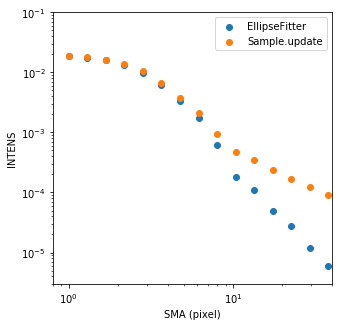

In [2]:
from photutils.datasets import load_irac_psf

ch1_hdu = load_irac_psf(channel=1)
ch1 = ch1_hdu.data
aper_pix = np.logspace(math.log10(1),math.log10(38),15)
inten1 = np.zeros(15)
inten2 = np.zeros(15)
i=0
for aper_sma in aper_pix:
    #EllipseSample + EllipseFitter
    geo1 = EllipseGeometry(x0=40, y0=40, sma=0.8, eps=0.001, pa=0., fix_eps =True, fix_center=True)
    sample1 = EllipseSample(ch1, aper_sma, geometry=geo1)
    Fitter1 = EllipseFitter(sample1)
    isolist1 = Fitter1.fit()
    
    #EllipseSample + update
    geo2 = EllipseGeometry(x0=40, y0=40, sma=0.8, eps=0.001, pa=0., fix_eps =True, fix_pa=True, fix_center=True)
    sample2 = EllipseSample(ch1, aper_sma, geometry=geo2)
    sample2.update(fixed_parameters=None)

    inten1[i]=isolist1.intens
    inten2[i]=sample2.mean
    i=i+1

fig1,axes=plt.subplots(figsize=(5,5), nrows=1,ncols=1, sharex=True) 
axes.scatter(aper_pix,inten1,label='EllipseFitter')
axes.scatter(aper_pix,inten2,label='Sample.update')
axes.set_yscale('log')
axes.set_xscale('log')
axes.set_xlim(0.8,40)
axes.set_ylim(3e-6,0.1)
axes.set_xlabel('SMA (pixel)')
axes.set_ylabel('INTENS')
plt.legend()